In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from tensorflow.keras.regularizers import l2

In [2]:
dataframe = pd.read_excel("fitur_combined.xlsx")
dataframe

,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio,Label
0,66.258988,61.227073,67.783226,65.158415,2.446483,0.055664,0.356445,0.263221,47.929862,72.003950,1.502277,1
1,64.446686,55.173210,58.302508,56.017323,0.943396,0.061523,0.308594,0.270054,41.226092,66.227144,1.606438,1
2,62.692141,99.537279,79.573600,75.421263,3.571429,0.042969,0.290039,0.286273,56.264081,128.622281,2.286046,1
3,63.433824,92.245610,64.134624,60.074981,4.487179,0.056641,0.389648,0.316059,45.349569,121.406513,2.677126,1
4,62.803729,58.825938,82.869466,79.547163,2.258065,0.047852,0.297852,0.333677,58.597402,58.808881,1.003609,1
...,...,...,...,...,...,...,...,...,...,...,...,...
375,77.975022,115.369311,47.334256,36.668310,18.783069,0.041992,0.237305,1.660196,33.469633,159.627078,4.769311,0
376,61.620302,129.153809,107.123572,97.890381,20.469799,0.061523,0.225586,0.217286,75.747572,166.099565,2.192804,0
377,79.215083,121.597106,57.423703,47.552360,16.492147,0.066406,0.249023,3.201225,40.600369,166.697921,4.105823,0
378,69.334370,137.593830,121.752307,112.744990,13.636364,0.085938,0.200195,1.629231,86.090591,174.288084,2.024473,0


In [3]:
# X = dataframe[["SDNN", "SD2", "RMSSD", "SD1", "SDSD", "pNN50", "LF", "HR"]]
X = dataframe[["SDNN", "SD2", "RMSSD", "SD1", "SDSD", "pNN50"]]
num_feature=len(X.columns)

y = dataframe["Label"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [5]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units=64, input_shape=(num_feature,), activation="relu"),
        tf.keras.layers.Dense(units=512, activation="relu"),
        tf.keras.layers.Dense(units=256, activation="relu"),
        tf.keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)


#new model with normalization and dropout
# model = tf.keras.Sequential(
#     [
#         tf.keras.layers.Dense(units=64, input_shape=(num_feature,), activation="relu"),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Dense(units=512, activation="relu"),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Dense(units=256, activation="relu"),
#         tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(units=1, activation="sigmoid"),
#     ]
# )

c:\Users\ASUS\anaconda3\envs\cuda-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)


history = model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_split=0.2)

Epoch 1/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4914 - loss: 1.8970 - val_accuracy: 0.5000 - val_loss: 0.7025
Epoch 2/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5603 - loss: 0.8009 - val_accuracy: 0.6852 - val_loss: 0.7461
Epoch 3/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6476 - loss: 0.7490 - val_accuracy: 0.4815 - val_loss: 0.6724
Epoch 4/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5809 - loss: 0.6195 - val_accuracy: 0.6296 - val_loss: 0.6882
Epoch 5/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5937 - loss: 0.6678 - val_accuracy: 0.7222 - val_loss: 0.6366
Epoch 6/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6825 - loss: 0.5861 - val_accuracy: 0.7407 - val_loss: 0.6354
Epoch 7/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6679 - loss: 0.5883 - val_accuracy: 0.6667 - val_loss: 0.6481
Epoch 8/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7769 - loss: 0.5426 - val_accuracy: 0

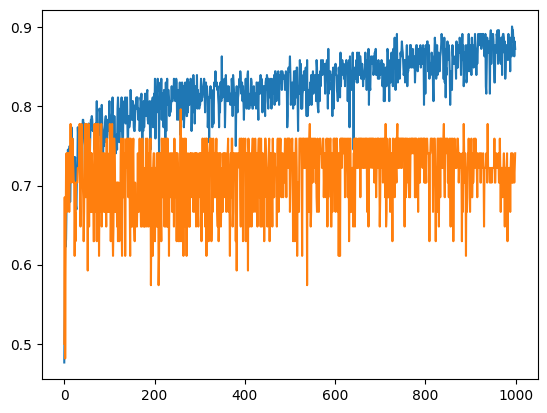

In [7]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

In [8]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print(f"Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7594 - loss: 0.9010 
Loss: 0.7834556698799133
Accuracy: 0.7632


In [9]:
X_test

,SDNN,SD2,RMSSD,SD1,SDSD,pNN50
349,80.011561,105.948395,55.685954,39.375286,52.856955,3.125000
302,54.600580,68.477182,50.385310,35.627665,32.244796,25.783972
106,102.026940,135.300286,68.677201,48.561818,55.425719,21.293801
61,72.225977,99.011153,34.280735,24.238851,19.850137,14.331210
310,60.933275,73.403962,63.412256,44.839129,45.255994,29.411765
...,...,...,...,...,...,...
150,74.216252,82.109774,91.993333,65.048746,88.264550,4.037267
82,102.136827,140.614141,46.048548,32.561240,30.642832,23.958333
267,45.119479,54.182649,47.297682,33.444300,31.548476,20.875421
326,59.558763,82.460864,21.445358,15.161245,14.014898,2.088773


In [10]:
prediction = model.predict(X_test)
predicted_labels = (prediction > 0.5).astype(int)
print(predicted_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]]


Text(113.9222222222222, 0.5, 'predicted class')

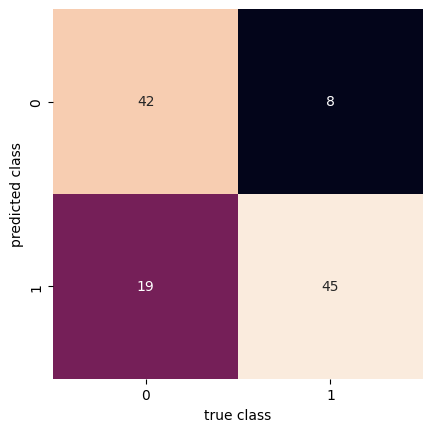

In [11]:
conmat = confusion_matrix(y_test, predicted_labels)
sns.heatmap(conmat.T, square=True, annot=True, fmt="d", cbar=False)
plt.xlabel("true class")
plt.ylabel("predicted class")